In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import cv2

import torch
import matplotlib.pyplot as plt
from model import Model
import numpy as np
from data import *
from data import dataset
from torch.utils.data import DataLoader
import data
import torch.cuda.amp as amp
from loss import Loss_test
from optim import Optimizer_test
import matplotlib
from skimage.color import rgb2hsv, hsv2rgb
from PIL import Image as im
from tqdm import tqdm
from data import dataset

c:\Users\20161699\Anaconda3\envs\joowan\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import math
def psnr(original, contrast):
    mse = np.mean((original - contrast) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    PSNR = 20 * math.log10(PIXEL_MAX / math.sqrt(mse))
    return PSNR


In [5]:
blur_img_path='c:/dataset/GOPRO_Large/test/GOPR0384_11_05/blur/004001.png'
sharp_img_path='c:/dataset/GOPRO_Large/test/GOPR0384_11_05/sharp/004001.png'

In [6]:
blur_img=cv2.imread(blur_img_path)
blur_img=cv2.cvtColor(blur_img,cv2.COLOR_BGR2RGB)
sharp_img=cv2.imread(sharp_img_path)
sharp_img=cv2.cvtColor(sharp_img,cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(blur_img)
plt.subplot(2,1,2)
plt.imshow(sharp_img)






plt.show()


c:\Users\20161699\Anaconda3\envs\joowan\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [16]:
checkpoint=torch.load('experiment/models/best_model.pt')


In [17]:
checkpoint.keys()

dict_keys(['G', 'D'])

In [18]:
model=checkpoint['G']
final_model=Model()
final_model.load_state_dict(model)
final_model.eval()

test_ds=dataset.test_dataset()
test_dataloader=DataLoader(test_ds,batch_size=1,num_workers=1)
#optimizer=Optimizer_test(final_model,scheduler=None)
criterion=Loss_test(final_model)

Loss function: ModuleDict(
  (L2): MSELoss()
)
Metrics: PSNR,SSIM


In [22]:
torch.set_grad_enabled(False)
for idx,batch in enumerate(tqdm(test_dataloader)):
    inputs, target = data.common.to(batch[0], batch[1], device='cuda:0',dtype=torch.float32)
    
    output=final_model(inputs)
    
    loss=criterion(output,target)
    
    
    
    psnr_list=[]
    output_list=output[0]
    target_list=target[0]
    metric=0
    for i in range(3):
        output_batch=output[i]
        target_batch=target[i]

        output_img=output_batch[0].permute(1,2,0).to('cpu',torch.uint8).numpy()
        target_img=target_batch[0].permute(1,2,0).to('cpu',torch.uint8).numpy()

        metric+=psnr(target_img,output_img)

    metric=metric/3
    psnr_list.append(metric)
    #print(f'{idx+1}th image psnr:{metric:.4f}')

print(sum(psnr_list)/idx+1)


  0%|          | 1/1111 [00:05<1:35:53,  5.18s/it]

1th image psnr:27.8866


  0%|          | 2/1111 [00:07<1:09:29,  3.76s/it]

2th image psnr:27.8775


  0%|          | 3/1111 [00:11<1:03:51,  3.46s/it]

3th image psnr:27.8775


  0%|          | 4/1111 [00:14<1:00:47,  3.29s/it]

4th image psnr:27.8818


  0%|          | 5/1111 [00:16<55:35,  3.02s/it]  

5th image psnr:27.8979


  1%|          | 6/1111 [00:19<55:40,  3.02s/it]

6th image psnr:27.9179


  1%|          | 6/1111 [00:20<1:03:26,  3.44s/it]


KeyboardInterrupt: 

In [10]:
model=checkpoint['G']
final_model=Model()
final_model.load_state_dict(model)
final_model.eval()

train_ds=dataset.train_dataset()
train_dataloader=DataLoader(train_ds,batch_size=1)


In [11]:
torch.set_grad_enabled(False)
for idx,batch in enumerate(tqdm(train_dataloader)):
    inputs, target = data.common.to(batch[0], batch[1], device='cuda:0',dtype=torch.float32)
    
    output=final_model(inputs)
    break
    


  0%|          | 0/1893 [00:01<?, ?it/s]


In [12]:
target[0].shape

torch.Size([1, 3, 256, 256])

In [13]:
result=output[0]

In [14]:
result.shape

torch.Size([1, 3, 256, 256])

In [52]:
output_img = result[0].permute(1, 2, 0).to('cpu',torch.uint8).numpy()
target_img=target[0][0].permute(1,2,0).to('cpu',torch.uint8).numpy()

In [54]:
import math
def psnr(original, contrast):
    mse = np.mean((original - contrast) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    PSNR = 20 * math.log10(PIXEL_MAX / math.sqrt(mse))
    return PSNR

print(psnr(target_img,output_img))

27.740931290936174


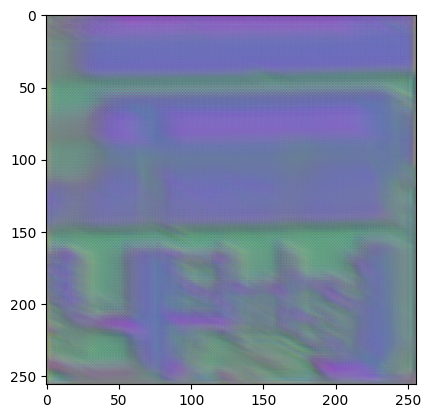

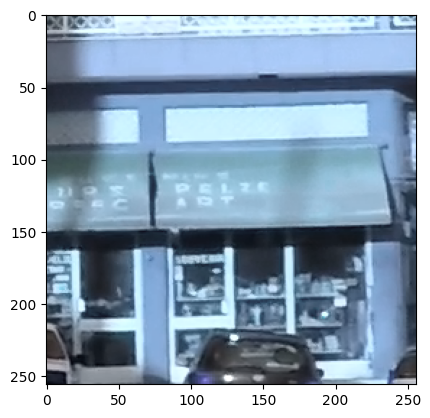

In [53]:
plt.imshow(output_img)
plt.show()
plt.imshow(target_img)
plt.show()

In [20]:
output_img=cv2.cvtColor(output_img,cv2.COLOR_YUV2BGR)

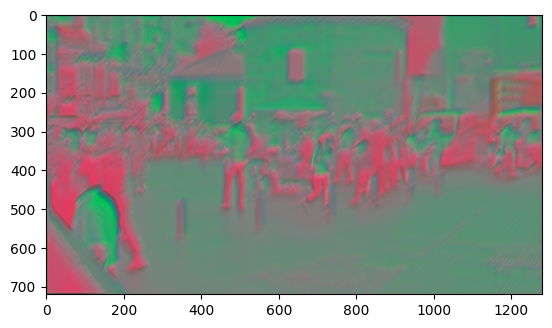

In [21]:
plt.imshow(output_img)